In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import save
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score

In [60]:
path_data = 'THz_Spectrum.npy'
path_y = 'all_processed_data.npz'

In [61]:
THz_Spectrum_list = []
for n in range(1,401,1):
    data = np.load(path_data+str(n)+'.npy')
    Data_1D = np.ravel(data)
    THz_Spectrum_list.append(Data_1D)

In [62]:
THz_Spectrum_arr = np.array(THz_Spectrum_list)
#THz_Spectrum_arr.shape

In [63]:
data_y = np.load(path_y)
y = data_y['y']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(THz_Spectrum_arr,y,test_size=0.2, train_size=0.8)

In [65]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 4096)
(80, 4096)
(320, 3)
(80, 3)


In [66]:
model_Linear = LinearRegression()
model_Ridge = Ridge()
model_Lasso = Lasso()
model_ElasticNet = ElasticNet()
model_RandomForestRegressor = RandomForestRegressor()

In [69]:
model_Linear.fit(X_train,y_train)
model_Ridge.fit(X_train,y_train)
model_Lasso.fit(X_train,y_train)
model_ElasticNet.fit(X_train,y_train)
model_RandomForestRegressor.fit(X_train,y_train)

RandomForestRegressor()

In [74]:
y_pred_Linear = model_Linear.predict(X_test)
y_pred_Ridge = model_Ridge.predict(X_test)
y_pred_Lasso = model_Lasso.predict(X_test)
y_pred_ElasticNet = model_ElasticNet.predict(X_test)
y_pred_RandomForestRegressor =model_RandomForestRegressor.predict(X_test)

In [75]:
## MSE
MSE_Linear = mean_squared_error(y_test,y_pred_Linear)
MSE_Ridge = mean_squared_error(y_test,y_pred_Ridge)
MSE_Lasso = mean_squared_error(y_test,y_pred_Lasso)
MSE_ElasticNet = mean_squared_error(y_test,y_pred_ElasticNet)
MSE_RandomForestRegressor = mean_squared_error(y_test,y_pred_RandomForestRegressor)

#R-Square
R2_Linear = r2_score(y_test,y_pred_Linear)
R2_Ridge = r2_score(y_test,y_pred_Ridge)
R2_Lasso = r2_score(y_test,y_pred_Lasso)
R2_ElasticNet = r2_score(y_test,y_pred_ElasticNet)
R2_RandomForestRegressor = r2_score(y_test,y_pred_RandomForestRegressor)


In [76]:
print('MSE_Linear :',MSE_Linear)
print('MSE_Ridge :',MSE_Ridge)
print('MSE_Lasso :',MSE_Lasso)
print('MSE_ElasticNet :',MSE_ElasticNet)
print('MSE_RandomForestRegressor : ',MSE_RandomForestRegressor)

MSE_Linear : 0.0025075951326963292
MSE_Ridge : 0.0017456264904573303
MSE_Lasso : 0.06126306017711056
MSE_ElasticNet : 0.06126306017711056
MSE_RandomForestRegressor :  0.005291593137678234


In [77]:
print('R2_Linear : ',R2_Linear)
print('R2_Ridge :',R2_Ridge)
print('R2_Lasso :',R2_Lasso)
print('R2_ElasticNet : ',R2_ElasticNet)
print('R2_RandomForestRegressor : ',R2_RandomForestRegressor)

R2_Linear :  0.9592280845240477
R2_Ridge : 0.9716750682661722
R2_Lasso : -0.00037940626772255587
R2_ElasticNet :  -0.00037940626772255587
R2_RandomForestRegressor :  0.9137533583274619


In [1]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plot
from numpy import asarray
from numpy import unique
from numpy import argmax
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets.mnist import load_data
from sklearn.metrics import mean_squared_error,r2_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model

In [22]:
path_data = '/Users/HP/Desktop/Data/DataAnalysis_raman/spectrum400pic_Xfixed/'

In [2]:
THz_Spectrum_list = []
#read multiple file
import os
import glob
fpath = 'C:/Users/HP/Desktop/Data/DataAnalysis_raman/spectrum400pic_Xfixed/'
read_file = glob.glob(os.path.join(fpath,"*.npy"))
THz_Spectrum_list= []
for file in read_file:
    data = np.load(file)
    data1 = np.ravel(data)
    THz_Spectrum_list.append(data1)

In [3]:
THz_Spectrum_arr = np.array(THz_Spectrum_list)

In [4]:
data_y = np.load('all_processed_data.npz')
y = data_y['y']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(THz_Spectrum_arr,y,test_size=0.2, train_size=0.8)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(320, 4096) (80, 4096) (320, 3) (80, 3)


In [6]:
n_features = X_train.shape[1]

In [51]:
#define model 
model = Sequential()
model.add(Dense(540, activation='relu',input_shape=(n_features,)))
model.add(Dense(280, activation='relu'))
model.add(Dense(140, activation='relu'))
#model.add(Dense(70, activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))

model.add(Dense(3),activation='softmax')

TypeError: add() got an unexpected keyword argument 'activation'

In [7]:
model = Sequential()
model.add(Dense(512, activation='relu',input_shape=(n_features,)))
#model.add(Dense(400))
#model.add(Dense(300))
#model.add(Dense(200))
#model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(40))
model.add(Dense(30))
model.add(Dense(10))
model.add(Dense(5))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))

In [8]:
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               2097664   
_________________________________________________________________
dense_1 (Dense)              (None, 50)                25650     
_________________________________________________________________
dense_2 (Dense)              (None, 40)                2040      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 55        
_________________________________________________________________
dropout (Dropout)            (None, 5)                 0

In [9]:
graph = model.fit(X_train,y_train,epochs=5000,batch_size=500,verbose=1,validation_split=0.3)

Epoch 1/5000
1/1 [==============================] - 0s 283ms/step - loss: 0.0847 - accuracy: 0.3839 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2585 - accuracy: 0.3527 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2919 - accuracy: 0.2991 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2884 - accuracy: 0.3214 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 5/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2870 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 6/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 7/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2877 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 8/5000

Epoch 59/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 60/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 61/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 62/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 63/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 64/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2884 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 65/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2883 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 

1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 174/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 175/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 176/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 177/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 178/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 179/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 180/5000

1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 288/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 289/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 290/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 291/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2892 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 292/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 293/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 294/5000

1/1 [==============================] - 0s 30ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 402/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 403/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2878 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 404/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 405/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 406/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 407/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 408/5000

1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 516/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 517/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 518/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 519/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 520/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 521/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2880 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 522/5000

1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 630/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 631/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 632/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 633/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2864 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 634/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 635/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 636/5000

1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 744/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 745/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 746/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 747/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 748/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2865 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 749/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 750/5000

1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 858/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 859/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 860/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 861/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 862/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 863/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2865 - accuracy: 0.3304 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 864/5000

1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 972/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 973/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 974/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 975/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 976/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 977/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 978/5000

1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1086/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1087/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1088/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1089/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1090/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1091/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 10

1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1143/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1144/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1145/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1146/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1147/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1148/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 11

1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1200/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1201/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1202/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1203/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1204/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1205/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 12

1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1257/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1258/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1259/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2877 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1260/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1261/5000
1/1 [==============================] - 0s 60ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1262/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 12

1/1 [==============================] - 0s 30ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1314/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1315/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1316/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2870 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1317/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1318/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1319/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 13

1/1 [==============================] - 0s 32ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1371/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1372/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1373/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1374/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1375/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1376/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 13

1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1428/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1429/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1430/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1431/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1432/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1433/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 14

1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1485/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1486/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1487/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1488/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1489/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1490/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 14

1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1542/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1543/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1544/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1545/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1546/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1547/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 15

1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1599/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2888 - accuracy: 0.3214 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1600/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1601/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1602/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1603/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1604/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 16

1/1 [==============================] - 0s 23ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1656/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1657/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1658/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1659/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1660/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1661/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2870 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 16

1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1713/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1714/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1715/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1716/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1717/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1718/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 17

1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1770/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1771/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1772/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1773/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1774/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1775/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 17

1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1827/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1828/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1829/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1830/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1831/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1832/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 18

1/1 [==============================] - 0s 32ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1884/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1885/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1886/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1887/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1888/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1889/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 18

1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1941/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1942/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1943/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1944/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1945/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1946/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 19

1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1998/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 1999/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2000/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2870 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2001/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2002/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2003/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 20

1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2055/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2056/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2057/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2058/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2059/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2060/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 20

1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2112/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2113/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2114/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2115/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2116/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2117/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 21

1/1 [==============================] - 0s 35ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2169/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2170/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2171/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2172/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2173/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2174/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 21

1/1 [==============================] - 0s 23ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2226/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2227/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2228/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2229/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2230/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2231/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 22

1/1 [==============================] - 0s 23ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2283/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2284/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2285/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2286/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2877 - accuracy: 0.3304 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2287/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2288/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 22

1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2340/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2341/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2342/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2343/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2344/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2345/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 23

1/1 [==============================] - 0s 30ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2397/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2398/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2399/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2400/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2401/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2866 - accuracy: 0.3304 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2402/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 24

1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2454/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2455/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2456/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2457/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2458/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2459/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 24

1/1 [==============================] - 0s 33ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2511/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2512/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2513/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2514/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2515/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2516/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 25

Epoch 2624/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2625/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2626/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2865 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2627/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2628/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2629/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2630/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy:

Epoch 2681/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2682/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2683/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2684/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2685/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2686/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2687/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy:

Epoch 2738/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2739/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2740/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2741/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2742/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2743/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2744/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy:

Epoch 2795/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2796/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2797/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2798/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2799/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2800/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2801/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy:

Epoch 2852/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2853/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2854/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2855/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2856/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2857/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2858/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy:

Epoch 2909/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2910/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2911/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2883 - accuracy: 0.3214 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2912/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2913/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2914/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2915/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy:

Epoch 2966/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2967/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2850 - accuracy: 0.3304 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2968/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2969/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2970/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2971/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 2972/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy:

Epoch 3023/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3024/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3025/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3026/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3027/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3028/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3029/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy:

Epoch 3080/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3081/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3082/5000
1/1 [==============================] - 0s 22ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3083/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3084/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2867 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3085/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3086/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy:

Epoch 3137/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3138/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3139/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3140/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2878 - accuracy: 0.3214 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3141/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3142/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3143/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy:

Epoch 3194/5000
1/1 [==============================] - 0s 44ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3195/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.2886 - accuracy: 0.3214 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3196/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3197/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3198/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3199/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3200/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy:

Epoch 3251/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2868 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3252/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3253/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3254/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3255/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3256/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3257/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy:

Epoch 3308/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3309/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3310/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3311/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3312/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3313/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3314/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy:

Epoch 3365/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3366/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3367/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3368/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3369/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3370/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3371/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy:

Epoch 3422/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2876 - accuracy: 0.3214 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3423/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3424/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3425/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3426/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3427/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3428/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy:

Epoch 3479/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3480/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3481/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3482/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3483/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3484/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3485/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy:

Epoch 3536/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3537/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3538/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3539/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3540/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3541/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3542/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy:

Epoch 3593/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3594/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3595/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3596/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3597/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3598/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3599/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy:

Epoch 3650/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3651/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3652/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3653/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3654/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3655/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3656/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy:

Epoch 3707/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3708/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3709/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3710/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3711/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3712/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3713/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy:

Epoch 3764/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3765/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3766/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3767/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2883 - accuracy: 0.3214 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3768/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3769/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3770/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy:

Epoch 3821/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3822/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3823/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3824/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3825/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2886 - accuracy: 0.3214 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3826/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3827/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy:

Epoch 3878/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.2879 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3879/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3880/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2872 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3881/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3882/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3883/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3884/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy:

Epoch 3935/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3936/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3937/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3938/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3939/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3940/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3941/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy:

Epoch 3992/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3993/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3994/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3995/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3996/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3997/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 3998/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy:

Epoch 4049/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4050/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4051/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4052/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4053/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4054/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4055/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy:

Epoch 4106/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4107/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2877 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4108/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4109/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4110/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4111/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4112/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2874 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy:

Epoch 4163/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4164/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4165/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4166/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4167/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4168/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4169/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy:

Epoch 4220/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4221/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4222/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4223/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4224/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4225/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4226/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy:

Epoch 4277/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.2869 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4278/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4279/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4280/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4281/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4282/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2889 - accuracy: 0.3214 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4283/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy:

Epoch 4334/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4335/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4336/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4337/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4338/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4339/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4340/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy:

Epoch 4391/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4392/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4393/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4394/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4395/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4396/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4397/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy:

Epoch 4448/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4449/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4450/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4451/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4452/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4453/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4454/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy:

Epoch 4505/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4506/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4507/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4508/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4509/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4510/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4511/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy:

Epoch 4562/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4563/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4564/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2883 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4565/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4566/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4567/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4568/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy:

Epoch 4619/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4620/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4621/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4622/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4623/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4624/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4625/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy:

Epoch 4676/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4677/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4678/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2865 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4679/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4680/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4681/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4682/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy:

Epoch 4733/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4734/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4735/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4736/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4737/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4738/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4739/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy:

Epoch 4790/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4791/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4792/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4793/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4794/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4795/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4796/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy:

Epoch 4847/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4848/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4849/5000
1/1 [==============================] - 0s 24ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4850/5000
1/1 [==============================] - 0s 23ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4851/5000
1/1 [==============================] - 0s 27ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4852/5000
1/1 [==============================] - 0s 72ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4853/5000
1/1 [==============================] - 0s 41ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy:

Epoch 4904/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4905/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4906/5000
1/1 [==============================] - 0s 43ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4907/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4908/5000
1/1 [==============================] - 0s 31ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4909/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4910/5000
1/1 [==============================] - 0s 26ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy:

Epoch 4961/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4962/5000
1/1 [==============================] - 0s 25ms/step - loss: 0.2892 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4963/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4964/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4965/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4966/5000
1/1 [==============================] - 0s 44ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy: 0.3333
Epoch 4967/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.2885 - accuracy: 0.3259 - val_loss: 0.2798 - val_accuracy:

In [61]:
print(graph.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [62]:
loss,acc = model.evaluate(X_test,y_test,verbose=0)
print('accuracy :',acc*100,'%')
print('loss :',loss )

accuracy : 40.00000059604645 %
loss : 0.2858603298664093


In [63]:
y_pred = model.predict(X_test)

In [64]:
print(y_pred.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 3)
(320, 4096)
(80, 4096)
(320, 3)
(80, 3)


In [65]:
m = mean_squared_error(y_test,y_pred)
r = math.sqrt(m)
print('MSE = ',m)
print('RMSE = ',r)

MSE =  0.2858603105384491
RMSE =  0.534659060091989


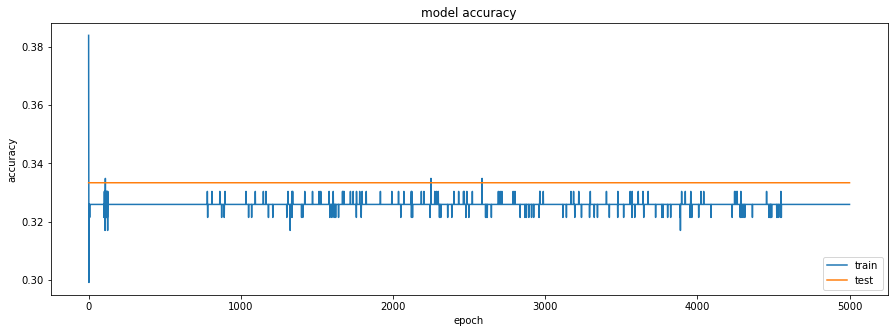

In [13]:
plt.figure(figsize=(15,5))
plt.plot(graph.history['accuracy'])
plt.plot(graph.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

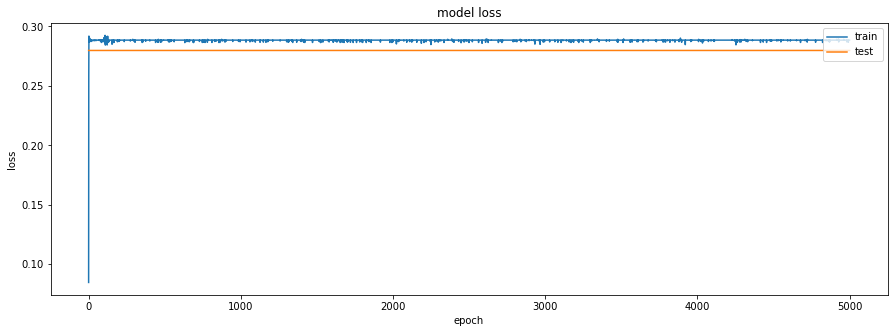

In [15]:
plt.figure(figsize=(15,5))
plt.plot(graph.history['loss'])
plt.plot(graph.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()